<center><h1>Least Squares Support Vector Classifier</h1></center>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.append('/content/drive/My Drive/LSSVM-master')


# 2. Using the classifier <a class="anchor" id="using_classifier"></a>

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits, fetch_olivetti_faces,fetch_lfw_people
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.datasets import cifar10


from lssvm import LSSVC, LSSVC_GPU, LSSVC_OPT
from utils.encoding import dummie2multilabel

## 2.1 CPU/Numpy version <a class="anchor" id="cpu_version"></a>

In [4]:
!pip install -q kaggle

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Upload kaggle.json
# please follow this link incase not aware: https://www.kaggle.com/general/74235
from google.colab import files
files.upload()

! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/moltean/fruits'
od.download(dataset_url)

Saving kaggle.json to kaggle (1).json
Skipping, found downloaded files in "./fruits" (use force=True to force download)


In [7]:
!ls fruits/fruits-360_dataset/fruits-360


LICENSE  papers  readme.md  Test  test-multiple_fruits	Training


In [8]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC

import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from torch.utils.data import Dataset
import os
import PIL.Image as Image



# --- Step 1: Load the Fruits 360 Dataset ---
data_dir = 'fruits/fruits-360_dataset/fruits-360/'
dim = 100
def getYourFruits(fruits, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['Training', 'Test']
    if not k_fold:
        path = data_dir + data_type + "/"
        for i,f in enumerate(fruits):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), " images of " , fruits[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = data_dir + v + "/"
            for i,f in enumerate(fruits):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels

def getAllFruits():
    fruits = []
    for fruit_path in gl:
      ob.glob(data_dir + "Training/*")
      fruit = fruit_path.split("/")[-1]
      fruits.append(fruit)
    return fruits


In [9]:
!ls fruits/fruits-360_dataset/fruits-360/Training/

'Apple Braeburn'        Clementine	    Mangostan		  Pineapple
'Apple Crimson Snow'    Cocos		    Maracuja		 'Pineapple Mini'
'Apple Golden 1'        Corn		   'Melon Piel de Sapo'  'Pitahaya Red'
'Apple Golden 2'       'Corn Husk'	    Mulberry		  Plum
'Apple Golden 3'       'Cucumber Ripe'	    Nectarine		 'Plum 2'
'Apple Granny Smith'   'Cucumber Ripe 2'   'Nectarine Flat'	 'Plum 3'
'Apple Pink Lady'       Dates		   'Nut Forest'		  Pomegranate
'Apple Red 1'	        Eggplant	   'Nut Pecan'		 'Pomelo Sweetie'
'Apple Red 2'	        Fig		   'Onion Red'		 'Potato Red'
'Apple Red 3'	       'Ginger Root'	   'Onion Red Peeled'	 'Potato Red Washed'
'Apple Red Delicious'   Granadilla	   'Onion White'	 'Potato Sweet'
'Apple Red Yellow 1'   'Grape Blue'	    Orange		 'Potato White'
'Apple Red Yellow 2'   'Grapefruit Pink'    Papaya		  Quince
 Apricot	       'Grapefruit White'  'Passion Fruit'	  Rambutan
 Avocado	       'Grape Pink'	    Peach		  Raspberry
'Avocado ripe'	       'Grape White'	   'Peach

In [10]:
import os

# Specify the path to the directory you want to list subfolders for
directory_path = 'fruits/fruits-360_dataset/fruits-360/Training/'

# Get a list of subfolders in the specified directory
subfolders = [f for f in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, f))]

# Print the list of subfolders
print(subfolders)
selected_classes = subfolders

['Apple Granny Smith', 'Tomato 4', 'Tomato 1', 'Onion Red', 'Papaya', 'Pepper Green', 'Pear 2', 'Pear Williams', 'Potato Sweet', 'Kumquats', 'Huckleberry', 'Plum 2', 'Avocado ripe', 'Tomato 3', 'Apple Braeburn', 'Avocado', 'Rambutan', 'Hazelnut', 'Grape White 2', 'Pepper Yellow', 'Grapefruit Pink', 'Tomato Heart', 'Peach Flat', 'Blueberry', 'Orange', 'Limes', 'Pear Kaiser', 'Mandarine', 'Mulberry', 'Tomato not Ripened', 'Pepino', 'Ginger Root', 'Potato Red Washed', 'Maracuja', 'Physalis with Husk', 'Pepper Orange', 'Passion Fruit', 'Apple Red 3', 'Mango Red', 'Eggplant', 'Nectarine Flat', 'Apple Red 1', 'Lychee', 'Apple Golden 3', 'Grape Blue', 'Cherry 1', 'Lemon', 'Apple Red Yellow 1', 'Lemon Meyer', 'Grape White 3', 'Apricot', 'Cherry Rainier', 'Nut Forest', 'Pitahaya Red', 'Pineapple Mini', 'Chestnut', 'Pear Red', 'Apple Crimson Snow', 'Physalis', 'Pineapple', 'Strawberry Wedge', 'Beetroot', 'Pear', 'Apple Golden 2', 'Nut Pecan', 'Pepper Red', 'Cantaloupe 2', 'Tamarillo', 'Tomato Ye

In [56]:
selected_classes = ['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith',
                    'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2','Apple Red 3','Apple Red Delicious','Apple Red Yellow 1','Apple Red Yellow 2','Apricot',
                    'Avocado','Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot','Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2',
                    'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black','Cherry Wax Red','Cherry Wax Yellow','Chestnut', 'Clementine',
                    'Cocos', 'Corn', 'Corn Husk','Cucumber Ripe','Cucumber Ripe 2','Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue' , 'Grapefruit Pink',
                    'Grapefruit White', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kohlrabi', 'Kumquats',
                    'Lemon', 'Lemon Meyer', 'Limes']

# selected_classes = subfolders;
#

# selected_classes = ['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith',
#                     'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2','Apple Red 3','Apple Red Delicious','Apple Red Yellow 1','Apple Red Yellow 2','Apricot',
#                     'Avocado','Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot','Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2',
#                     'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black']


# selected_classes = ['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady']

# selected_classes = ['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1']

# Select Fruits
fruits = selected_classes

#Get Images and Labels
X_t, y_train =  getYourFruits(fruits, 'Training', print_n=True, k_fold=False)
X_test, y_test = getYourFruits(fruits, 'Test', print_n=True, k_fold=False)

#Get data for k-fold
X,y = getYourFruits(fruits, '', print_n=True, k_fold=True)

#Scale Data Images
scaler = StandardScaler()
X_tr_norm = scaler.fit_transform([i.flatten() for i in X_t])
X_ts_norm = scaler.fit_transform([i.flatten() for i in X_test])
X = scaler.fit_transform([i.flatten() for i in X])

# Get information about input and outputs
print(f"X_train.shape: {X_tr_norm.shape}")
print(f"X_test.shape:  {X_ts_norm.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape:  {y_test.shape}")
print(f"np.unique(y_train): {np.unique(y_train)}")
print(f"np.unique(y_test):  {np.unique(y_test)}")


There are  492   TRAINING  images of  APPLE BRAEBURN
There are  444   TRAINING  images of  APPLE CRIMSON SNOW
There are  480   TRAINING  images of  APPLE GOLDEN 1
There are  492   TRAINING  images of  APPLE GOLDEN 2
There are  481   TRAINING  images of  APPLE GOLDEN 3
There are  492   TRAINING  images of  APPLE GRANNY SMITH
There are  456   TRAINING  images of  APPLE PINK LADY
There are  492   TRAINING  images of  APPLE RED 1
There are  492   TRAINING  images of  APPLE RED 2
There are  429   TRAINING  images of  APPLE RED 3
There are  490   TRAINING  images of  APPLE RED DELICIOUS
There are  492   TRAINING  images of  APPLE RED YELLOW 1
There are  672   TRAINING  images of  APPLE RED YELLOW 2
There are  492   TRAINING  images of  APRICOT
There are  427   TRAINING  images of  AVOCADO
There are  491   TRAINING  images of  AVOCADO RIPE
There are  490   TRAINING  images of  BANANA
There are  450   TRAINING  images of  BANANA LADY FINGER
There are  490   TRAINING  images of  BANANA RED
Ther

In [57]:
print('Polynomial kernel:')
lssvc = LSSVC_OPT(gamma=1, kernel='poly', d=2)
lssvc.pruning(0.9)
start_time = time.time()
lssvc.fit_incremental(X_tr_norm, y_train, batch_size=1000) # Fitting the model
end_time = time.time()
training_time_seconds = end_time - start_time
training_time_formatted = time.strftime("%H:%M:%S", time.gmtime(training_time_seconds))
print(f"Total training time: {training_time_formatted}")


y_pred = lssvc.predict(X_ts_norm)
acc = accuracy_score(dummie2multilabel(y_test), dummie2multilabel(y_pred))
precision = precision_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
recall = recall_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
f1 = f1_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
print('acc_test = ', acc)
print('precision = ', precision)
print('recall = ', recall)
print('f1 = ', f1, '\n')

Polynomial kernel:
Batches: 31
batch N- 0
Total training time: 00:00:00
Total training time: 00:00:00
Total training time: 00:00:00
batch N- 1
Total training time: 00:00:00
Total training time: 00:00:00
Total training time: 00:00:01
batch N- 2
Total training time: 00:00:00
Total training time: 00:00:00
Total training time: 00:00:00
batch N- 3
Total training time: 00:00:00
Total training time: 00:00:00
Total training time: 00:00:00
batch N- 4
Total training time: 00:00:00
Total training time: 00:00:00
Total training time: 00:00:00
batch N- 5
Total training time: 00:00:00
Total training time: 00:00:00
Total training time: 00:00:00
batch N- 6
Total training time: 00:00:00
Total training time: 00:00:00
Total training time: 00:00:00
batch N- 7
Total training time: 00:00:00
Total training time: 00:00:00
Total training time: 00:00:00
batch N- 8
Total training time: 00:00:01
Total training time: 00:00:00
Total training time: 00:00:00
batch N- 9
Total training time: 00:00:00
Total training time

4 classes - 17 s

5 classes - 37 s

6 classes - 72s - 1m 12s

7 classes - 126 - 2m 22s | batch 2m 9s |

8 classes -

9 classes -

In [21]:
import time

print('Polynomial kernel:')
lssvc = LSSVC(gamma=1, kernel='poly', d=2)

start_time = time.time()
lssvc.fit(X_tr_norm, y_train) # Fitting the model
end_time = time.time()
training_time_seconds = end_time - start_time
training_time_formatted = time.strftime("%H:%M:%S", time.gmtime(training_time_seconds))
print(f"Total training time: {training_time_formatted}")


y_pred = lssvc.predict(X_ts_norm)
acc = accuracy_score(dummie2multilabel(y_test), dummie2multilabel(y_pred))
precision = precision_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
recall = recall_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
f1 = f1_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
print('acc_test = ', acc)
print('precision = ', precision)
print('recall = ', recall)
print('f1 = ', f1, '\n')


Polynomial kernel:
Total  8
Label
0
Label
1
Label
2
Label
3
Label
4
Label
5
Label
6
Label
7
Total training time: 00:03:02
acc_test =  1.0
precision =  1.0
recall =  1.0
f1 =  1.0 



In [12]:
lssvc.y_labels

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [13]:
# lssvc.dump()

In [14]:
# from google.colab import files
# files.download('model.json')

In [35]:
import numpy as np
from numpy import dot
import time

from utils.kernel import get_kernel
from utils.import_export import dump_model, load_model
from utils.conversion import numpy_json_encoder

"""
    LSSVC implementation with available optimization mechanisms for bigger datasets.
    Achieved by batching training data and pruning vectors after each batch
"""
class LSSVC_OPT():

    def __init__(self, gamma=1, kernel='rbf', **kernel_params):
        # Hyperparameters
        self.gamma = gamma
        self.kernel_ = kernel
        self.kernel_params = kernel_params

        # Model parameters
        self.alpha = None
        self.b = None
        self.sv_x = None
        self.sv_y = None
        self.y_labels = None
        self.pruning_percentage = 0.05

        self.K = get_kernel(kernel, **kernel_params)

    def pruning(self, t):
        self.pruning_percentage = t


    def _optimize_parameters(self, X, y_values):
        """Help function that optimizes the dual variables through the
        use of the kernel matrix pseudo-inverse.
        """
        sigma = np.multiply(y_values * y_values.T, self.K(X, X))

        A = np.block([
            [0, y_values.T],
            [y_values, sigma + self.gamma**-1 * np.eye(len(y_values))]
        ])
        B = np.array([0] + [1] * len(y_values))

        A_cross = np.linalg.pinv(A)

        solution = np.dot(A_cross, B)
        b = solution[0]
        alpha = solution[1:]
        return b, alpha


    def fit_batch(self, X_batch, y_batch):
        y_reshaped = y_batch.reshape(-1, 1) if y_batch.ndim == 1 else y_batch

        if self.sv_x is None:
            self.sv_x = X_batch
            self.sv_y = y_reshaped
            self.y_labels = np.unique(self.sv_y, axis=0)
        else:
            # Append the current batch to the existing dataset
            self.sv_x = np.vstack((self.sv_x, X_batch))
            self.sv_y = np.vstack((self.sv_y, y_reshaped))
            # Update y_labels to include all unique labels across all batches
            self.y_labels = np.unique(self.sv_y, axis=0)

        if len(self.y_labels) == 2:
            # Binary classification
            y_values = np.where((self.sv_y == self.y_labels[0]).all(axis=1), -1, +1)[:, np.newaxis]
            self.b, self.alpha = self._optimize_parameters(self.sv_x, y_values)
        else:
            # Multiclass classification (one-vs-all approach)
            n_classes = len(self.y_labels)
            self.b = np.zeros(n_classes)
            self.alpha = np.zeros((n_classes, len(self.sv_y)))

            for i in range(n_classes):
                y_values = np.where((self.sv_y == self.y_labels[i]).all(axis=1), +1, -1)[:, np.newaxis]
                self.b[i], self.alpha[i] = self.measure_time(self._optimize_parameters, self.sv_x, y_values)
        self.vector_pruning()

    def vector_pruning(self):
      pruning_threshold=0.01

      if self.pruning_percentage == 0:
          return

      # Calculate the importance of support vectors (alpha)
      support_vector_importance = np.abs(self.alpha)
      # Calculate the number of alphas less than 0.001
      num_alphas_below_threshold = np.sum(self.alpha < 0.001)
      # Determine the number of vectors to prune based on the specified pruning percentage
      num_vectors_to_prune_percentage = int(self.pruning_percentage * len(self.alpha))
      # Choose the lesser of the two pruning criteria
      num_vectors_to_prune = min(num_alphas_below_threshold, num_vectors_to_prune_percentage)
      # Find the indices of the worst vectors to prune
      worst_vector_indices = np.argpartition(support_vector_importance, num_vectors_to_prune)[:num_vectors_to_prune]

      # Remove the worst support vectors
      self.sv_x = np.delete(self.sv_x, worst_vector_indices, axis=0)
      self.sv_y = np.delete(self.sv_y, worst_vector_indices, axis=0)
      self.alpha = np.delete(self.alpha, worst_vector_indices)


    def fit_incremental(self, X_train, y_train, batch_size=100):
        n_samples = X_train.shape[0]
        n_batches = (n_samples + batch_size - 1) // batch_size  # Calculate the number of batches

        print("Batches: " + str(n_batches))
        for batch_idx in range(n_batches):
            print("batch N- " + str(batch_idx))
            start_idx = batch_idx * batch_size
            end_idx = min((batch_idx + 1) * batch_size, n_samples)

            X_batch = X_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]

            self.fit_batch(X_batch, y_batch)

    def predict(self, X):
        """Predicts the labels of data X given a trained model.
        - X: ndarray of shape (n_samples, n_attributes)
        """
        if self.alpha is None:
            raise Exception(
                "The model doesn't see to be fitted, try running .fit() method first"
            )

        X_reshaped = X.reshape(1,-1) if X.ndim==1 else X
        KxX = self.K(self.sv_x, X_reshaped)

        if len(self.y_labels)==2: # binary classification
            y_values = np.where(
                (self.sv_y == self.y_labels[0]).all(axis=1),
                -1,+1)[:,np.newaxis]

            y = np.sign(dot(np.multiply(self.alpha, y_values.flatten()), KxX) + self.b)

            y_pred_labels = np.where(y==-1, self.y_labels[0], self.y_labels[1])

        else: # multiclass classification, one-vs-all approach
            y = np.zeros((len(self.y_labels), len(X)))
            for i in range(len(self.y_labels)):
                y_values = np.where(
                    (self.sv_y == self.y_labels[i]).all(axis=1),
                    +1, -1)[:,np.newaxis]
                y[i] = dot(np.multiply(self.alpha[i], y_values.flatten()), KxX) + self.b[i]

            predictions = np.argmax(y, axis=0)
            y_pred_labels = np.array([self.y_labels[i] for i in predictions])

        return y_pred_labels



    def measure_time(self, func, *args):
        start_time = time.time()
        result = func(*args)
        end_time = time.time()
        training_time_seconds = end_time - start_time
        training_time_formatted = time.strftime("%H:%M:%S", time.gmtime(training_time_seconds))
        print(f"Total training time: {training_time_formatted}")
        return result


    def dump(self, filepath='model', only_hyperparams=False):
        """This method saves the model in a JSON format.
        - filepath: string, default = 'model'
            File path to save the model's json.
        - only_hyperparams: boolean, default = False
            To either save only the model's hyperparameters or not, it
            only affects trained/fitted models.
        """
        model_json = {
            'type': 'LSSVC',
            'hyperparameters': {
                'gamma': self.gamma,
                'kernel': self.kernel_,
                'kernel_params': self.kernel_params
            }
        }

        if (self.alpha is not None) and (not only_hyperparams):
            model_json['parameters'] = {
                'alpha': self.alpha,
                'b': self.b,
                'sv_x': self.sv_x,
                'sv_y': self.sv_y,
                'y_labels': self.y_labels
            }

        dump_model(model_dict=model_json, file_encoder=numpy_json_encoder, filepath=filepath)

    @classmethod
    def load(cls, filepath, only_hyperparams=False):
        """This class method loads a model from a .json file.
        - filepath: string
            The model's .json file path.
        - only_hyperparams: boolean, default = False
            To either load only the model's hyperparameters or not, it
            only has effects when the dump of the model as done with the
            model's parameters.
        """
        model_json = load_model(filepath=filepath)

        if model_json['type'] != 'LSSVC':
            raise Exception(
                f"Model type '{model_json['type']}' doesn't match 'LSSVC'"
            )

        lssvc = LSSVC(
            gamma = model_json['hyperparameters']['gamma'],
            kernel = model_json['hyperparameters']['kernel'],
            **model_json['hyperparameters']['kernel_params']
        )

        if (model_json.get('parameters') is not None) and (not only_hyperparams):
            lssvc.alpha = np.array(model_json['parameters']['alpha'])
            lssvc.b = np.array(model_json['parameters']['b'])
            lssvc.sv_x = np.array(model_json['parameters']['sv_x'])
            lssvc.sv_y = np.array(model_json['parameters']['sv_y'])
            lssvc.y_labels = np.array(model_json['parameters']['y_labels'])

        return lssvc



In [23]:
import time

print('Polynomial kernel:')
lssvc = LSSVC_OPT(gamma=1, kernel='poly', d=2)
lssvc.pruning(0.05)
start_time = time.time()
lssvc.fit_incremental(X_tr_norm, y_train, batch_size=1500) # Fitting the model
end_time = time.time()
training_time_seconds = end_time - start_time
training_time_formatted = time.strftime("%H:%M:%S", time.gmtime(training_time_seconds))
print(f"Total training time: {training_time_formatted}")


y_pred = lssvc.predict(X_ts_norm)
acc = accuracy_score(dummie2multilabel(y_test), dummie2multilabel(y_pred))
precision = precision_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
recall = recall_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
f1 = f1_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
print('acc_test = ', acc)
print('precision = ', precision)
print('recall = ', recall)
print('f1 = ', f1, '\n')


Polynomial kernel:
Batches: 3
batch N- 0
Label: 0
Total training time: 00:00:02
Label: 1
Total training time: 00:00:02
Label: 2
Total training time: 00:00:02
Label: 3
Total training time: 00:00:02
batch N- 1
Label: 0
Total training time: 00:00:15
Label: 1
Total training time: 00:00:14
Label: 2
Total training time: 00:00:13
Label: 3
Total training time: 00:00:13
Label: 4
Total training time: 00:00:13
Label: 5
Total training time: 00:00:13
Label: 6
Total training time: 00:00:12
batch N- 2
Label: 0
Total training time: 00:00:18
Label: 1
Total training time: 00:00:18
Label: 2
Total training time: 00:00:18
Label: 3
Total training time: 00:00:17
Label: 4
Total training time: 00:00:17
Label: 5
Total training time: 00:00:18
Label: 6
Total training time: 00:00:17
Total training time: 00:03:51
acc_test =  0.867026055705301
precision =  0.7517341812718917
recall =  0.867026055705301
f1 =  0.8052744405732585 



In [25]:
import time

print('Polynomial kernel:')
lssvc = LSSVC_OPT(gamma=1, kernel='poly', d=2)
lssvc.pruning(0.9)
start_time = time.time()
lssvc.fit_incremental(X_tr_norm, y_train, batch_size=1500) # Fitting the model
end_time = time.time()
training_time_seconds = end_time - start_time
training_time_formatted = time.strftime("%H:%M:%S", time.gmtime(training_time_seconds))
print(f"Total training time: {training_time_formatted}")


y_pred = lssvc.predict(X_ts_norm)
acc = accuracy_score(dummie2multilabel(y_test), dummie2multilabel(y_pred))
precision = precision_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
recall = recall_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
f1 = f1_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
print('acc_test = ', acc)
print('precision = ', precision)
print('recall = ', recall)
print('f1 = ', f1, '\n')

Polynomial kernel:
Batches: 3
batch N- 0
Label: 0
Total training time: 00:00:02
Label: 1
Total training time: 00:00:02
Label: 2
Total training time: 00:00:02
Label: 3
Total training time: 00:00:03
batch N- 1
Label: 0
Total training time: 00:00:02
Label: 1
Total training time: 00:00:02
Label: 2
Total training time: 00:00:01
Label: 3
Total training time: 00:00:01
batch N- 2
Label: 0
Total training time: 00:00:00
Total training time: 00:00:19
acc_test =  0.867026055705301
precision =  0.7517341812718917
recall =  0.867026055705301
f1 =  0.8052744405732585 



In [42]:
import time

print('Polynomial kernel:')
lssvc = LSSVC_OPT(gamma=0.1, kernel='poly', d=2)
lssvc.pruning(0.9)
start_time = time.time()
lssvc.fit_incremental(X_tr_norm, y_train, batch_size=1000) # Fitting the model
end_time = time.time()
training_time_seconds = end_time - start_time
training_time_formatted = time.strftime("%H:%M:%S", time.gmtime(training_time_seconds))
print(f"Total training time: {training_time_formatted}")


y_pred = lssvc.predict(X_ts_norm)
acc = accuracy_score(dummie2multilabel(y_test), dummie2multilabel(y_pred))
precision = precision_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
recall = recall_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
f1 = f1_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
print('acc_test = ', acc)
print('precision = ', precision)
print('recall = ', recall)
print('f1 = ', f1, '\n')

Polynomial kernel:
Batches: 13
batch N- 0
Label: 0
Total training time: 00:00:01
Label: 1
Total training time: 00:00:01
Label: 2
Total training time: 00:00:01
batch N- 1
Label: 0
Total training time: 00:00:01
Label: 1
Total training time: 00:00:01
Label: 2
Total training time: 00:00:00
batch N- 2
Label: 0
Total training time: 00:00:00
Label: 1
Total training time: 00:00:00
Label: 2
Total training time: 00:00:00
batch N- 3
Label: 0
Total training time: 00:00:00
Label: 1
Total training time: 00:00:00
Label: 2
Total training time: 00:00:00
batch N- 4
Label: 0
Total training time: 00:00:00
Label: 1
Total training time: 00:00:00
Label: 2
Total training time: 00:00:00
batch N- 5
Label: 0
Total training time: 00:00:00
Label: 1
Total training time: 00:00:00
Label: 2
Total training time: 00:00:00
batch N- 6
Label: 0
Total training time: 00:00:01
Label: 1
Total training time: 00:00:01
Label: 2
Total training time: 00:00:01
batch N- 7
Label: 0
Total training time: 00:00:01
Label: 1
Total training

In [44]:
# Preprocessing

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Scale the features
scaler = MinMaxScaler()
scaler.fit(X_train.reshape(-1, 32*32*3))  # Reshape to apply scaling to individual pixel values
x_train_norm = scaler.transform(X_train.reshape(-1, 32*32*3))
x_test_norm = scaler.transform(X_test.reshape(-1, 32*32*3))

# Split the data into 20% for training
x_train_subset, x_val_subset, y_train_subset, y_val_subset = train_test_split(
    x_train_norm, y_train, test_size=0.1, random_state=42)

# # Further split the 10% for training and validation if needed
# x_train_subset, x_val_subset, y_train_subset, y_val_subset = train_test_split(
#     x_train_subset, y_train_subset, test_size=0.5, random_state=42)


scaler = MinMaxScaler()
scaler.fit(X_train.reshape(-1, 32*32*3))  # Reshape to apply scaling to individual pixel values
x_train_norm = scaler.transform(X_train.reshape(-1, 32*32*3))
x_test_norm = scaler.transform(X_test.reshape(-1, 32*32*3))


X_tr_norm = x_train_subset
X_ts_norm = x_val_subset
y_train = y_train_subset
y_test = y_val_subset
# Get information about input and outputs
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape:  {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape:  {y_test.shape}")
print(f"np.unique(y_train): {np.unique(y_train)}")
print(f"np.unique(y_test):  {np.unique(y_test)}")

X_train.shape: (50000, 32, 32, 3)
X_test.shape:  (10000, 32, 32, 3)
y_train.shape: (45000, 1)
y_test.shape:  (5000, 1)
np.unique(y_train): [0 1 2 3 4 5 6 7 8 9]
np.unique(y_test):  [0 1 2 3 4 5 6 7 8 9]


In [46]:
print('Polynomial kernel:')
lssvc = LSSVC_OPT(gamma=0.1, kernel='poly', d=2)
lssvc.pruning(0.7)
start_time = time.time()
lssvc.fit_incremental(X_tr_norm, y_train, batch_size=2000) # Fitting the model
end_time = time.time()
training_time_seconds = end_time - start_time
training_time_formatted = time.strftime("%H:%M:%S", time.gmtime(training_time_seconds))
print(f"Total training time: {training_time_formatted}")


y_pred = lssvc.predict(X_ts_norm)
acc = accuracy_score(dummie2multilabel(y_test), dummie2multilabel(y_pred))
precision = precision_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
recall = recall_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
f1 = f1_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
print('acc_test = ', acc)
print('precision = ', precision)
print('recall = ', recall)
print('f1 = ', f1, '\n')

Polynomial kernel:
Batches: 23
batch N- 0
Label: 0
Total training time: 00:00:05
Label: 1
Total training time: 00:00:03
Label: 2
Total training time: 00:00:03
Label: 3
Total training time: 00:00:04
Label: 4
Total training time: 00:00:04
Label: 5
Total training time: 00:00:03
Label: 6
Total training time: 00:00:03
Label: 7
Total training time: 00:00:03
Label: 8
Total training time: 00:00:04
Label: 9
Total training time: 00:00:03
batch N- 1
Label: 0
Total training time: 00:00:03
Label: 1
Total training time: 00:00:04
Label: 2
Total training time: 00:00:05
Label: 3
Total training time: 00:00:03
Label: 4
Total training time: 00:00:03
Label: 5
Total training time: 00:00:03
Label: 6
Total training time: 00:00:04
Label: 7
Total training time: 00:00:03
Label: 8
Total training time: 00:00:03
Label: 9
Total training time: 00:00:03
batch N- 2
Label: 0
Total training time: 00:00:04
Label: 1
Total training time: 00:00:04
Label: 2
Total training time: 00:00:03
Label: 3
Total training time: 00:00:03


In [ ]:

print('Polynomial kernel:')
lssvc = LSSVC_OPT(gamma=1, kernel='poly', d=2)
lssvc.pruning(0.9)
start_time = time.time()
lssvc.fit_incremental(X_tr_norm, y_train, batch_size=2000) # Fitting the model
end_time = time.time()
training_time_seconds = end_time - start_time
training_time_formatted = time.strftime("%H:%M:%S", time.gmtime(training_time_seconds))
print(f"Total training time: {training_time_formatted}")


y_pred = lssvc.predict(X_ts_norm)
acc = accuracy_score(dummie2multilabel(y_test), dummie2multilabel(y_pred))
precision = precision_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
recall = recall_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
f1 = f1_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
print('acc_test = ', acc)
print('precision = ', precision)
print('recall = ', recall)
print('f1 = ', f1, '\n')

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
# Define a function to load and preprocess data for a batch
def load_and_preprocess_batch(fruits):
    #Get Images and Labels
    X_t, y_train =  getYourFruits(fruits, 'Training', print_n=True, k_fold=False)

    #Scale Data Images
    scaler = StandardScaler()
    X_tr_norm = scaler.fit_transform([i.flatten() for i in X_t])
    return X_tr_norm, y_train


# Initialize your LS-SVM model with pruning (adjust pruning as needed)
lssvc = LSSVC_OPT(gamma=1, kernel='poly', d=2)
lssvc.pruning(0.7)
batch_size = 2000


# Start training
start_time = time.time()

for i in range(0, len(selected_classes), 200):
    # Get the next 10 classes for this iteration
    subset_classes = selected_classes[i:i+200]

    # Load data for the current subset of classes
    X_tr_norm, y_train = load_and_preprocess_batch(subset_classes)
    lssvc.fit_incremental(X_tr_norm, y_train, batch_size=100)
    print(lssvc.y_labels)


end_time = time.time()
training_time_seconds = end_time - start_time
training_time_formatted = time.strftime("%H:%M:%S", time.gmtime(training_time_seconds))
print(f"Total training time: {training_time_formatted}")




Выходные данные были обрезаны до нескольких последних строк (5000).
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[4]
 [5]]
batch N- 28
DEBUG
[[4]
 [5]]
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]]
[[5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]]
INCREMENT
[[4]
 [4]
 [4]
 [4]
 [4]

In [13]:
print(lssvc.y_labels)

[[127]
 [128]
 [129]
 [130]]


In [23]:
# Select Fruits
fruits = selected_classes

X_test, y_test = getYourFruits(fruits, 'Test', print_n=True, k_fold=False)

#Get data for k-fold
X,y = getYourFruits(fruits, '', print_n=True, k_fold=True)

#Scale Data Images
scaler = StandardScaler()
X_ts_norm = scaler.fit_transform([i.flatten() for i in X_test])


# Evaluate your model on the test data
X_test_norm = scaler.transform([i.flatten() for i in X_test])
y_pred = lssvc.predict(X_test_norm)

# Calculate metrics
acc = accuracy_score(dummie2multilabel(y_test), dummie2multilabel(y_pred))
precision = precision_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
recall = recall_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')
f1 = f1_score(dummie2multilabel(y_test), dummie2multilabel(y_pred), average='weighted')

print('acc_test = ', acc)
print('precision = ', precision)
print('recall = ', recall)
print('f1 = ', f1, '\n')

There are  164   TEST  images of  APPLE BRAEBURN
There are  148   TEST  images of  APPLE CRIMSON SNOW
There are  160   TEST  images of  APPLE GOLDEN 1
There are  164   TEST  images of  APPLE GOLDEN 2
There are  161   TEST  images of  APPLE GOLDEN 3
There are  164   TEST  images of  APPLE GRANNY SMITH
There are  152   TEST  images of  APPLE PINK LADY
There are  164   TEST  images of  APPLE RED 1
acc_test =  0.8841033672670321
precision =  0.7816387640129046
recall =  0.8841033672670321
f1 =  0.8297196189895921 



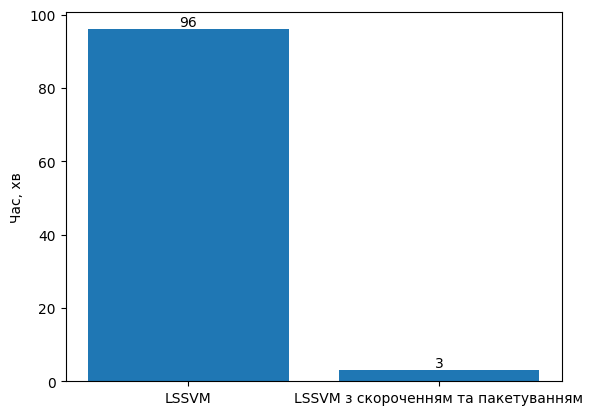

In [19]:
import matplotlib.pyplot as plt

# Sample data
categories = ['LSSVM', 'LSSVM з скороченням та пакетуванням']
values = [96, 3]

# Create a bar graph
plt.bar(categories, values)

# Add labels and title
# plt.xlabel('Categories')
plt.ylabel('Час, хв')
# plt.title('Bar Graph Example')
# Add values on top of each bar
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')
# Display the graph
plt.show()


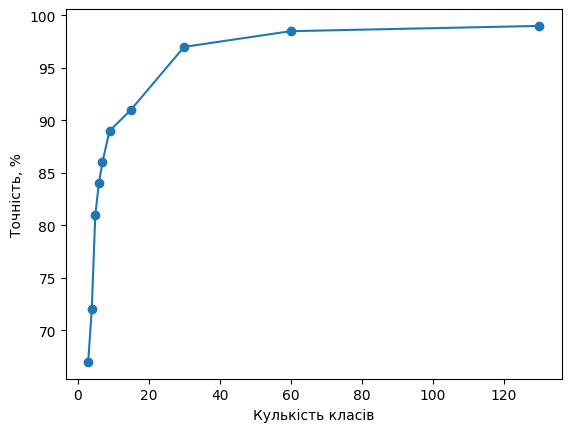

In [58]:
import matplotlib.pyplot as plt

# Sample data
x_values = [3, 4, 5, 6, 7, 9, 15, 30, 60, 130]
y_values = [67, 72, 81, 84, 86, 89, 91, 97, 98.5 , 99]

# Create a line graph with dots
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Кулькість класів')
plt.ylabel('Точність, %')
# plt.title('')

# Display the graph
plt.show()
